# MNIST Handwritten Digit Classifiation using CNN
![alt text](https://preview.redd.it/w97147bnm8g31.png?width=1433&format=png&auto=webp&s=84a2f361d62481c176b960fd1b1d723943771e32)

#Importing the Libraries

In [467]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Mnist dataset

In [ ]:
from tensorflow.keras.datasets import mnist

# Split the Data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
single_image = x_train[0]

In [ ]:
single_lable = y_train[0]

In [ ]:
single_image.shape

(28, 28)

In [ ]:
print(single_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

#Visualizing the Image Data

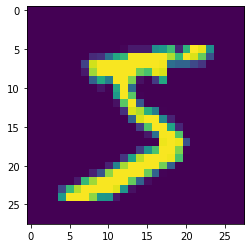

In [ ]:
plt.imshow(single_image)

In [ ]:
print(single_lable)

5


#PreProcessing Data
We first need to make sure the labels will be understandable by our CNN.

In [ ]:
from tensorflow.keras.utils import to_categorical,normalize

In [ ]:
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [ ]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_train.shape

(60000, 10)

# Normalized the X data

In [ ]:
x_test = normalize(x_test)
x_train = normalize(x_train)

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

# Reshaping the Data

In [ ]:
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1666 - accuracy: 0.9500 - val_loss: 0.0657 - val_accuracy: 0.9776
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0548 - accuracy: 0.9834 - val_loss: 0.0645 - val_accuracy: 0.9792
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 0.0430 - val_accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.0411 - val_accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.0400 - val_accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0481 - val_accuracy: 0.9861
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0127 - accuracy: 0.9956 - val_loss: 0.0421 - val_accuracy:

#Evaluate the Model

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.166621,0.950050,0.065685,0.9776
1,0.054809,0.983383,0.064515,0.9792
2,0.036669,0.988767,0.042992,0.9850
3,0.025965,0.991533,0.041099,0.9860
4,0.019640,0.993467,0.040025,0.9873


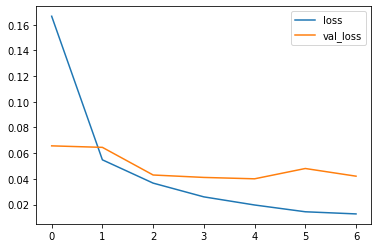

In [ ]:
losses[['loss','val_loss']].plot()

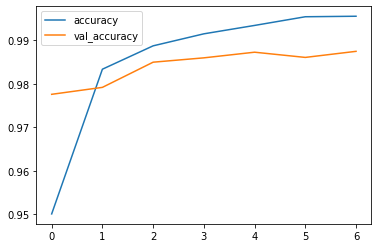

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04207190126180649, 0.987500011920929]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pred = model.predict_classes(x_test)

In [ ]:
y_test[0]

7

In [ ]:
pred[0]

7

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print(confusion_matrix(y_test,pred))

[[ 967    0    5    0    0    1    6    1    0    0]
 [   0 1132    0    1    0    0    1    0    1    0]
 [   0    4 1015    4    0    0    1    5    2    1]
 [   0    0    2 1005    0    2    0    0    1    0]
 [   0    0    0    0  976    0    1    0    0    5]
 [   0    0    0    9    0  882    1    0    0    0]
 [   1    3    0    0    3    2  947    0    2    0]
 [   0    2    3    1    1    0    0 1015    2    4]
 [   2    1    3    3    0    1    2    1  959    2]
 [   0    3    3    7    9    5    0    2    3  977]]


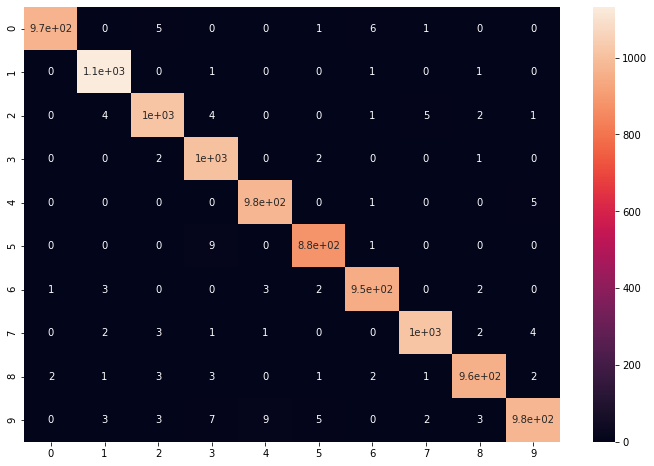

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

#Predicting a given image

In [ ]:
random_img = x_test[457]

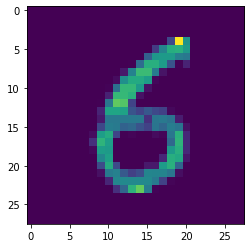

In [ ]:
plt.imshow(random_img.reshape(28,28))

In [ ]:
pred_ran = model.predict_classes(random_img.reshape(1,28,28,1))

In [ ]:
pred_ran

array([6])

# Predicting an image outside the train or test data 

In [ ]:
import cv2

In [ ]:
img = "three.png"

In [ ]:
img1 = cv2.imread(img)

In [ ]:
img1.shape

(320, 326, 3)

In [ ]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

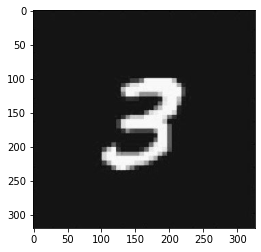

In [ ]:
plt.imshow(img1,cmap='gray')

In [ ]:
img1.shape

(320, 326)

In [ ]:
img1 =cv2.resize(img1,(28,28))

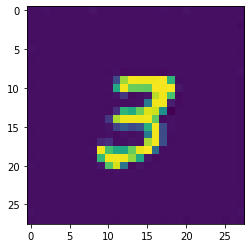

In [ ]:
plt.imshow(img1)

In [ ]:
img1.shape

(28, 28)

In [ ]:
img1 = normalize(img1)

In [ ]:
pred_ran = model.predict_classes(img1.reshape(1,28,28,1))

In [ ]:
pred_ran

array([3])

# Save the model

In [455]:
model.save("mnist-model.h5")

In [456]:
from tensorflow.keras.models import load_model

In [457]:
mnist_model = load_model("mnist-model.h5")

In [462]:
mnist_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [463]:
mnist_model.predict_classes(img1.reshape(1,28,28,1))

array([3])

#Looks like the CNN performed quite well!